## Basic Neural Network Starter Notebook

In [1]:
# Install libraries if needed
# Install libraries if needed
# !pip install tabulate 
# !pip install pandas 
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install tensorflow


### Import Dependencies

In [2]:
# General Packages
import math
import os
from pathlib import Path

# data handling libraries
import pandas as pd
import numpy as np
from tabulate import tabulate

# visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

# extra libraries
import warnings
warnings.filterwarnings('ignore')

# Packages to support NN

# sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#tensorflow
import tensorflow as tf
from tensorflow import keras

# Keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

### Load the data

In [3]:
# Load data from a folder called data within my project file
#  .. my_project
#     |
#     |___code
#     |   |
#     |   |__ CS3500_Starter_Notebook.ipynb
#     |
#     |___data
#         |
#         |__ credit_score.csv
#
#---------------------------------------------------------------

# Get the current working directory
current_dir = os.getcwd() 

# Construct a path to the parent directory
parent_dir = os.path.dirname(current_dir)

# Access a file in the parent directory
file_path = r"C:\Users\Seraf\OneDrive\Documents\Class\credit_score_cleaned_data.csv"

# Load Credit Score data
df = pd.read_csv(file_path) 

## Data Visualizations and Cleaning
### Look at the data

## Define Some Costume Functions to Examine Variables

## Performing Basic Data Cleaning

### Dropping some columns
From CS3500_Credit_score_classification_data_cleaning.ipynb we determined that some columns are not necessary. Also, for this model we will only consider an small amount of variables

In [4]:
# Dropping not related columns
##############################
columns_to_drop_unrelated = ['Unnamed: 0', 'Month', 'Name', 'SSN',]

# Drop columns
# df.drop(columns=columns_to_drop_unrelated, inplace=True)


# Dropping columns not in used in this model
##############################
# columns_to_drop_not_used= ['Num_Bank_Accounts', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment'
#                            , 'Changed_Credit_Limit', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Num_Credit_Inquiries'
#                            , 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Credit_History_Age'
#                            ,'Monthly_Balance', 'Payment_Behaviour']

# # Drop columns
# df.drop(columns=columns_to_drop_not_used, inplace=True)

# checking Columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  object 
 1   Age                       80000 non-null  int64  
 2   Occupation                80000 non-null  object 
 3   Annual_Income             80000 non-null  float64
 4   Monthly_Inhand_Salary     80000 non-null  float64
 5   Num_Bank_Accounts         80000 non-null  int64  
 6   Num_Credit_Card           80000 non-null  int64  
 7   Interest_Rate             80000 non-null  float64
 8   Num_of_Loan               80000 non-null  int64  
 9   Delay_from_due_date       80000 non-null  int64  
 10  Num_of_Delayed_Payment    80000 non-null  int64  
 11  Changed_Credit_Limit      80000 non-null  float64
 12  Num_Credit_Inquiries      80000 non-null  int64  
 13  Credit_Mix                80000 non-null  object 
 14  Outsta

### Analyze each column and model

We will perform the following tasks for each columns in the model:

1. Cast the column to the correct data type
2. handle missing values
3. Plot numerical columns to make sure distributions are correct

#### Age

In [5]:
# Extracting non-numeric textual data
#df['Age'][~df['Age'].str.isnumeric()].unique() 

In [6]:

# Looking at the above values, looks like many underscores are present in our dataset. 
# For age, they are not needed and can be replaced with blanks. 
# Some negative values are also present which we will handle later on.
# df['Age'] = df['Age'].str.replace('_', '')

# # get details on column
# df['Age'].describe()            

In [7]:
# cast column to integer
df['Age'] = df['Age'].astype(int)

# get details on column
df['Age'].describe()

count    80000.000000
mean        33.365625
std         10.749782
min         14.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         56.000000
Name: Age, dtype: float64

In [12]:
# As already noted in the data cleaning notebook,  there are many extreme values present in age column which are unrealistic in nature. 
# Lets set any inappropriate value which is not at all possible like negative and high positive values above 100 to null for now.
df['Age'][(df['Age'] > 100) | (df['Age'] <= 0)] = np.nan 

# get details on column
df['Age'].describe()

count    80000.000000
mean        33.365625
std         10.749782
min         14.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         56.000000
Name: Age, dtype: float64

In [13]:
# We have removed all inappropriate values and replaced them with nulls. What we have in our dataset is customer data, 
# if some month's age data is missing then we can simply refer the other months data of same customer to replace with an appropriate value.
df['Age'] =  df.groupby('Customer_ID')['Age'].fillna(method='ffill').fillna(method='bfill').astype(int)

# get details on column
df['Age'].describe()

count    80000.000000
mean        33.365625
std         10.749782
min         14.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         56.000000
Name: Age, dtype: float64

#### Occupation

In [14]:
# Extracting unique data
df['Occupation'].unique()

array(['Media_Manager', 'Architect', 'Accountant', 'Developer',
       'Musician', 'Mechanic', 'Lawyer', 'Journalist', 'Doctor',
       'Engineer', 'Teacher', 'Entrepreneur', 'Manager', 'Writer',
       'Scientist'], dtype=object)

In [15]:

# There is a placeholder present. We will replace it with null for now and deal with it later.
df['Occupation'][df['Occupation'] == '_______'] = np.nan

# get details on column
df['Occupation'].describe()

count      80000
unique        15
top       Lawyer
freq        5768
Name: Occupation, dtype: object

In [16]:
# counting null values
df['Occupation'].isnull().sum()

np.int64(0)

In [17]:
# So, no one has transitioned into new role or maybe its not mentioned and is coming as null. But these possibilities we obviously can't tell 
# until and unless we get back to the customer. We need to make the most appropriate educated guess for now.
df['Occupation'] =  df.groupby('Customer_ID')['Occupation'].fillna(method='ffill').fillna(method='bfill')

# get details on column
df['Occupation'].describe()

count      80000
unique        15
top       Lawyer
freq        5768
Name: Occupation, dtype: object

In [19]:
# Casting to correct data type
df['Occupation'] = df['Occupation'].astype("string")


### Annual_Income

In [20]:
# using regex to find values which don't follow the pattern of a float
# df['Annual_Income'][~df['Annual_Income'].str.fullmatch('([0-9]*[.])?[0-9]+')].unique() 

In [21]:
# # Replacing underscores with empty files
# df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')

# # get details on column
# df['Annual_Income'].describe()

In [22]:
# Casting to the correct data type
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [23]:
# From the data cleaning we know that the Annual Income  max value is 180,000, so we will set all values bigger than 180000 to NA
df.loc[df['Annual_Income'] > 180000, 'Annual_Income'] = pd.NA

# get details on column
df['Annual_Income'].describe()

count     79999.000000
mean      50477.130199
std       38386.782778
min        7005.930000
25%       19280.730000
50%       36821.000000
75%       71668.150000
max      179987.280000
Name: Annual_Income, dtype: float64

In [24]:
# Since the maximum is to big and probably 
df['Annual_Income'] = df.groupby('Customer_ID')['Annual_Income'].fillna(method='ffill').fillna(method='bfill')

# get details on column
df['Annual_Income'].describe()

count     80000.000000
mean      50476.590536
std       38386.846333
min        7005.930000
25%       19280.227500
50%       36819.645000
75%       71664.225000
max      179987.280000
Name: Annual_Income, dtype: float64

In [26]:
# Check variable using plots:

### Monthly Inhand Salary

In [27]:
# get details on column
df['Monthly_Inhand_Salary'].describe()

count    80000.000000
mean      4196.339376
std       3193.986148
min        319.556250
25%       1626.525000
50%       3074.046250
75%       5957.715000
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [28]:
# Since the maximum is to big and probably 
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(method='ffill').fillna(method='bfill')

# get details on column
df['Monthly_Inhand_Salary'].describe()

count    80000.000000
mean      4196.339376
std       3193.986148
min        319.556250
25%       1626.525000
50%       3074.046250
75%       5957.715000
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

### Number of Credit Cards

In [30]:
# get details on column
df['Num_Credit_Card'].describe()

count    80000.000000
mean         5.541462
std          2.062664
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Credit_Card, dtype: float64

In [31]:
# From the data cleaning we know that the Annual Income  max value is 180,000, so we will set all values bigger than 10 to NA
df.loc[df['Num_Credit_Card'] > 11, 'Num_Credit_Card'] = pd.NA

# get details on column
df['Num_Credit_Card'].describe()

count    80000.000000
mean         5.541462
std          2.062664
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Credit_Card, dtype: float64

In [32]:
# Since the maximum is to big and probably 
df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].fillna(method='ffill').fillna(method='bfill')

# get details on column
df['Num_Credit_Card'].describe()

count    80000.000000
mean         5.541462
std          2.062664
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Credit_Card, dtype: float64

### Interest Rate

In [34]:
# get details on column
df['Interest_Rate'].describe()

count    80000.000000
mean        14.560100
std          8.737674
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

In [35]:
# From the data cleaning we know that the Annual Income  max value is 180,000, so we will set all values bigger than 10 to NA
df.loc[df['Interest_Rate'] > 34, 'Interest_Rate'] = pd.NA

# get details on column
df['Interest_Rate'].describe()

count    80000.000000
mean        14.560100
std          8.737674
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

In [36]:
# filling NA with median
df['Interest_Rate'] = df.groupby('Customer_ID')['Interest_Rate'].transform(lambda x: x.median())

# get details on column
df['Interest_Rate'].describe()

count    80000.000000
mean        14.560100
std          8.737674
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

### Credit Mix

In [37]:
# get details on column
df['Credit_Mix'].describe()

count        80000
unique           3
top       Standard
freq         36632
Name: Credit_Mix, dtype: object

In [38]:
# The column contains underscores as placeholders. We will replace them with null for now.
df['Credit_Mix'][df['Credit_Mix'] == '_'] = np.nan

In [39]:
# From the data clean file, we will fill forward and backward any missing data
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].fillna(method='ffill').fillna(method='bfill')

# get details on column
df['Credit_Mix'].describe()

count        80000
unique           3
top       Standard
freq         36632
Name: Credit_Mix, dtype: object

In [41]:
# Casting to correct data type
df['Credit_Mix'] = df['Credit_Mix'].astype("string")


### Credit Utilization Ratio

In [42]:
# get details on column
df['Credit_Utilization_Ratio'].describe()

count    80000.000000
mean        32.303583
std          5.120211
min         20.000000
25%         28.063496
50%         32.343787
75%         36.515261
max         50.000000
Name: Credit_Utilization_Ratio, dtype: float64

In [44]:
#Combining Features

df['EMI_Salary_Ratio'] = df['Total_EMI_per_month'] / (df['Monthly_Inhand_Salary'] + 1)



### Credit Score

In [46]:
# Casting to correct data type
df['Credit_Score'] = df['Credit_Score'].astype("string")


### Feature Derivation/Engineering

In [47]:
# Perform any feature engineering and check with visualizations, recommend using a temporary dataframe for trial, 
# and then putting the actual code into the feature_engineering function below to be able to replicate the same 
# transformations to test data later on

## Feature Selection

In [48]:
# Drop costumer ID and cast ID
# df = df.drop(columns='Customer_ID')

# df['ID'] = df['ID'].astype('string')

# Getting information on the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  object 
 1   Age                       80000 non-null  int64  
 2   Occupation                80000 non-null  string 
 3   Annual_Income             80000 non-null  float64
 4   Monthly_Inhand_Salary     80000 non-null  float64
 5   Num_Bank_Accounts         80000 non-null  int64  
 6   Num_Credit_Card           80000 non-null  float64
 7   Interest_Rate             80000 non-null  float64
 8   Num_of_Loan               80000 non-null  int64  
 9   Delay_from_due_date       80000 non-null  int64  
 10  Num_of_Delayed_Payment    80000 non-null  int64  
 11  Changed_Credit_Limit      80000 non-null  float64
 12  Num_Credit_Inquiries      80000 non-null  int64  
 13  Credit_Mix                80000 non-null  string 
 14  Outsta

In [49]:
# If you want to change the variables for your model, do that here!
target = ['Credit_Score']
continuous_features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 
                      'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
                      'Delay_from_due_date', 'Num_of_Delayed_Payment',
                      'Changed_Credit_Limit', 'Outstanding_Debt',
                      'Credit_Utilization_Ratio', 'Credit_History_Age',
                      'Total_EMI_per_month', 'Amount_invested_monthly',
                      'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Inquiries']

categorical_features = ['Occupation', 'Credit_Mix', 'Payment_Behaviour', 
                       'Payment_of_Min_Amount', 'Last_Loan_1', 'Last_Loan_2', 
                       'Last_Loan_3', 'Last_Loan_4', 'Last_Loan_5']

In [50]:
# Encode variables to use in Neural Network
# A one hot encoding is appropriate for categorical data where no relationship exists between categories.
# It involves representing each categorical variable with a binary vector that has one element for each 
# unique label and marking the class label with a 1 and all other elements 0.

# For example, if our variable was “color” and the labels were “red,” “green,” and “blue,” we would encode 
# each of these labels as a three-element binary vector as follows:

# Red: [1, 0, 0]
# Green: [0, 1, 0]
# Blue: [0, 0, 1]

# Then each label in the dataset would be replaced with a vector (one column becomes three). 
# This is done for all categorical variables so that our nine input variables or columns become 
# 43 in the case of the breast cancer dataset.

# The scikit-learn library provides the OneHotEncoder to automatically one hot encode one or more variables.

# Encoder for input features
encoder = OneHotEncoder(handle_unknown='ignore')

# Encoder for target
le = LabelEncoder()

In [52]:

from sklearn.preprocessing import StandardScaler

# Encoding categorical features
encoded_features = encoder.fit_transform(df[categorical_features])
num_continuous_features = len(continuous_features)
num_encoded_columns = encoded_features.shape[1]

total_columns = num_continuous_features + num_encoded_columns
# Convert the encoded data back to a DataFrame:
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_features))

scaler = StandardScaler()

scaled_continuous = scaler.fit_transform(df[continuous_features])
X = np.hstack([scaled_continuous, encoded_features.toarray()])

#final_df = pd.concat([continuous_df, encoded_df], axis=1)

# joining dataframes 
df = pd.concat([df, encoded_df], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 109 entries, Customer_ID to Last_Loan_5_Student Loan
dtypes: float64(87), int64(7), object(12), string(3)
memory usage: 66.5+ MB
None


In [53]:

# Encoding categorical features
encoded_target = encoder.fit_transform(df[target])

# Convert the encoded data back to a DataFrame:
encoded_target_df = pd.DataFrame(encoded_target.toarray(), columns=encoder.get_feature_names_out(target))

# joining dataframes 
df = pd.concat([df, encoded_target_df], axis=1)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 112 entries, Customer_ID to Credit_Score_Standard
dtypes: float64(90), int64(7), object(12), string(3)
memory usage: 68.4+ MB
None


## Modeling

In [54]:
# Constructing dataframe for modeling
features_for_model = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Card'
                      , 'Interest_Rate', 'Credit_Utilization_Ratio', 'Credit_Mix_Bad'
                      , 'Credit_Mix_Good', 'Credit_Mix_Standard', 'Occupation_Accountant', 'Occupation_Architect'
                      , 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur'
                      , 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic'
                      ,'Occupation_Media_Manager' , 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher'
                      , 'Occupation_Writer'
                      ] 

target_features = ['Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard']

# Getting the size of input size
print(len(features_for_model))

24


In [55]:
# Defining data sets
#X = pd.concat([continuous_df, encoded_df], axis=1).toarray()
y = encoded_target.toarray()
# y = to_categorical(df[target_features])
print(y)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


### Train / test split

In [56]:
# Basic train-test split
# 80% training and 20% test 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=42)

# Checking the dimensions of the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(64000, 93)
(64000, 3)
(16000, 93)
(16000, 3)


In [57]:
# Printing X_train and y_train
print(X_train)
print(y_train)

[[ 2.01255339 -0.29261067 -0.34971703 ...  0.          0.
   0.        ]
 [-0.03401253 -0.17913932 -0.0989374  ...  0.          0.
   0.        ]
 [ 1.2683476   1.88039674  1.8235052  ...  0.          0.
   0.        ]
 ...
 [-1.80150128 -0.77774186 -0.73478007 ...  0.          0.
   0.        ]
 [-0.59216687 -0.99798795 -0.96485726 ...  0.          0.
   0.        ]
 [ 0.05901319 -0.43349653 -0.50303033 ...  0.          0.
   0.        ]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


### Neural Network

In [58]:
# Set up the layers
###################
# The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.
# Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

# Create network topology

from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore


model = keras.Sequential()

# Adding input model --> 24 input layers
model.add(Dense(total_columns, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))  # Dropout to reduce overfitting

# Hidden layers with Batch Normalization and Dropout
model.add(Dense(total_columns*2, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(total_columns*4, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(total_columns*2, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer for multi-class classification
model.add(Dense(3, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 93)             │         8,742 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 93)             │           372 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 93)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 186)            │        17,484 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 186)            │           744 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 186)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 372)            │        69,564 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 372)            │         1,488 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 372)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 186)            │        69,378 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 186)            │           744 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 186)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           561 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,077 (660.46 KB)

 Trainable params: 167,403 (653.92 KB)

 Non-trainable params: 1,674 (6.54 KB)

None


In [59]:
#Enhancement
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from tensorflow.keras.callbacks import ReduceLROnPlateau # type: ignore

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [60]:
# Compile the Model
###################
# Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
# Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
# Optimizer —This is how the model is updated based on the data it sees and its loss function.
# Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])



In [ ]:
# Train the Model
#################
# Training the neural network model requires the following steps:
# Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
# The model learns to associate images and labels.
# You ask the model to make predictions about a test set—in this example, the test_images array.
# Verify that the predictions match the labels from the test_labels array.
# Feed the model
# To start training, call the model.fit method—so called because it "fits" the model to the training data:  

model.fit(X_train, y_train, 
        validation_split=0.2, 
        epochs=50, 
        batch_size=32, 
        callbacks=[early_stopping, lr_scheduler])

Epoch 1/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5930 - loss: 0.9388 - val_accuracy: 0.6852 - val_loss: 0.7120 - learning_rate: 0.0010
Epoch 2/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6678 - loss: 0.7375 - val_accuracy: 0.6948 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 3/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6784 - loss: 0.7164 - val_accuracy: 0.7039 - val_loss: 0.6737 - learning_rate: 0.0010
Epoch 4/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6890 - loss: 0.7014 - val_accuracy: 0.7020 - val_loss: 0.6770 - learning_rate: 0.0010
Epoch 5/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6930 - loss: 0.6938 - val_accuracy: 0.7055 - val_loss: 0.6762 - learning_rate: 0.0010
Epoch 6/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6979 - loss: 0.6841 - val_accuracy: 0.7109 - val_loss: 0.6573 - learning_rate: 0.0010
Epoch 7/50
  51/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7078 - l

In [ ]:
#Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nLoss:', test_loss)

500/500 - 1s - 1ms/step - accuracy: 0.7690 - loss: 0.5484

Test accuracy: 0.7689999938011169

Loss: 0.5484474897384644


## Make Predictions

In [ ]:
# Make Predictions
predictions = model.predict(X_test)

# Here, the model has predicted the label for each image in the testing set. Let's take a look at some predictions
print(predictions[0])
print(predictions[10])
print(predictions[100])
print(predictions[1000])
print(predictions[10000])

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[0.0008773  0.84855294 0.15056975]
[0.73952436 0.00218902 0.25828663]
[3.2886237e-04 8.2183307e-01 1.7783804e-01]
[0.0012167  0.81794727 0.18083604]
[0.8663591  0.00719656 0.12644438]


In [ ]:
# 3 different credit scores. You can see the comparison between the trained and tested values

# getting y_test values
y_tested = encoder.inverse_transform(y_test)


# getting the value of the predictions
y_predicted = encoder.inverse_transform(predictions)

# printing the first 15 values of the test and predicted values 
data = []
for i in range(15):
    data.append([y_tested[i], y_predicted[i]])

headers = ["True Value", "Predicted Value"]

print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------+-------------------+
| True Value   | Predicted Value   |
+==============+===================+
| ['Standard'] | ['Poor']          |
+--------------+-------------------+
| ['Poor']     | ['Poor']          |
+--------------+-------------------+
| ['Standard'] | ['Poor']          |
+--------------+-------------------+
| ['Standard'] | ['Standard']      |
+--------------+-------------------+
| ['Good']     | ['Good']          |
+--------------+-------------------+
| ['Standard'] | ['Standard']      |
+--------------+-------------------+
| ['Standard'] | ['Standard']      |
+--------------+-------------------+
| ['Poor']     | ['Standard']      |
+--------------+-------------------+
| ['Standard'] | ['Standard']      |
+--------------+-------------------+
| ['Good']     | ['Good']          |
+--------------+-------------------+
| ['Good']     | ['Good']          |
+--------------+-------------------+
| ['Standard'] | ['Standard']      |
+--------------+-------------------+
|

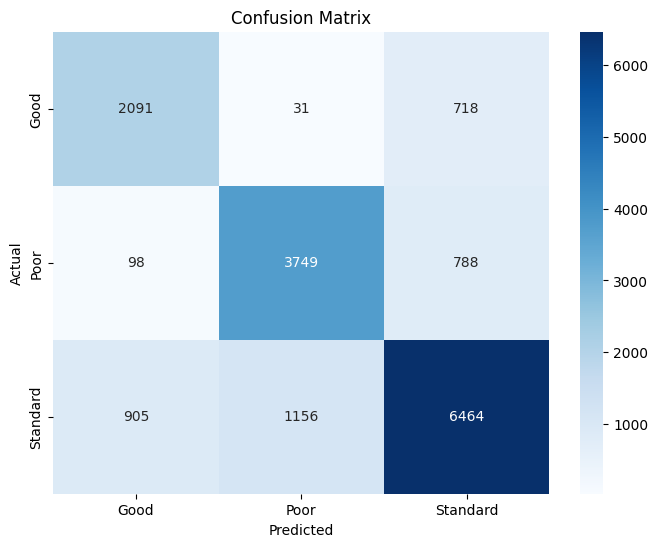

In [ ]:
# Confusion Matrix
##################

# A confusion matrix for 3 variables is a table that visually represents how well a classification model performs when 
# predicting three different categories, where each row represents the actual class and each column represents the predicted class,
# resulting in a 3x3 grid that shows how many instances were correctly classified and how many were misclassified between each 
# of the three possible categories; essentially, it provides a detailed breakdown of the model's errors for each class in 
# a multi-class classification problem.

# Key points about a 3-variable confusion matrix:
################################################
# Structure:
# The matrix has 3 rows and 3 columns, where each row represents one of the actual classes and each column represents one of the predicted classes. 
 
# Diagonal elements:
# The diagonal cells of the matrix represent the correctly classified instances for each class. 
 
# Off-diagonal elements:
# The values in off-diagonal cells represent the misclassified instances, showing which class the model tends to confuse with another. 

# Class labels
class_labels=['Good', 'Poor', 'Standard']

plot_prediction_vs_test_categorical(y_tested, y_predicted, class_labels)

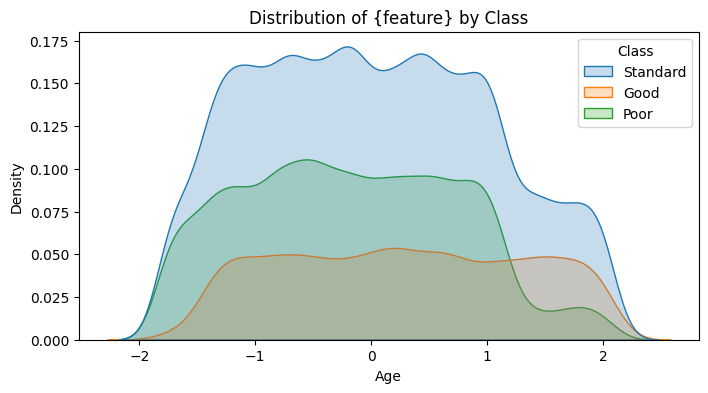

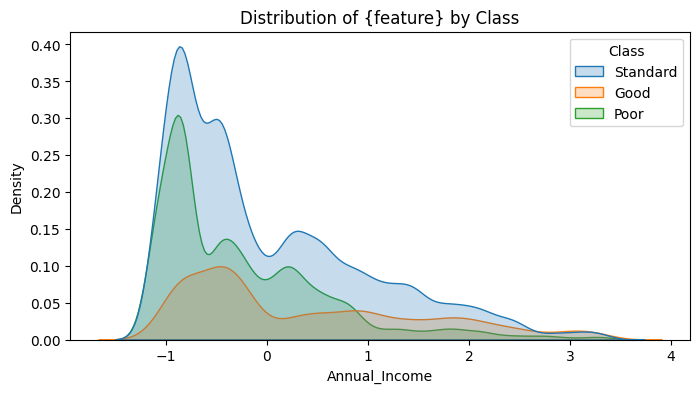

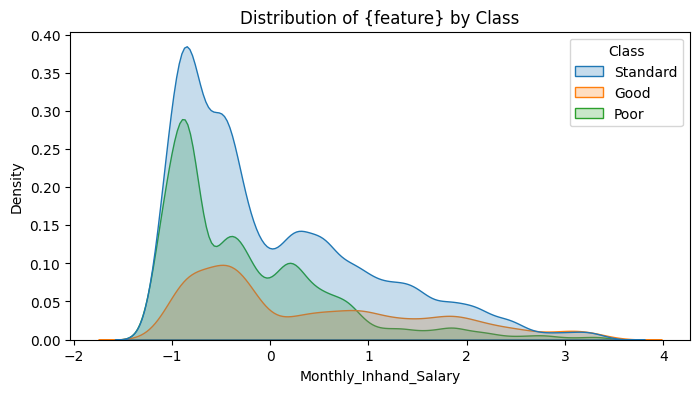

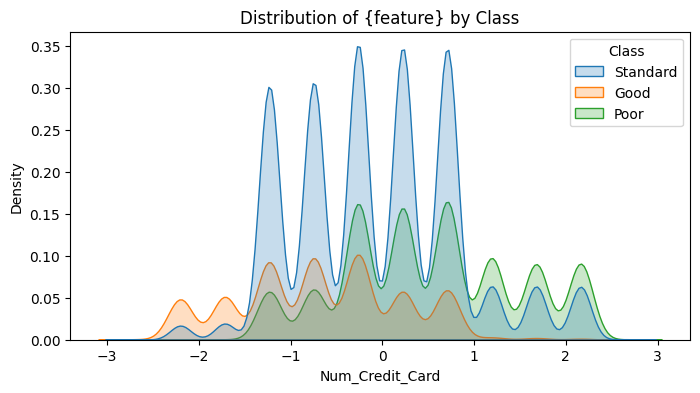

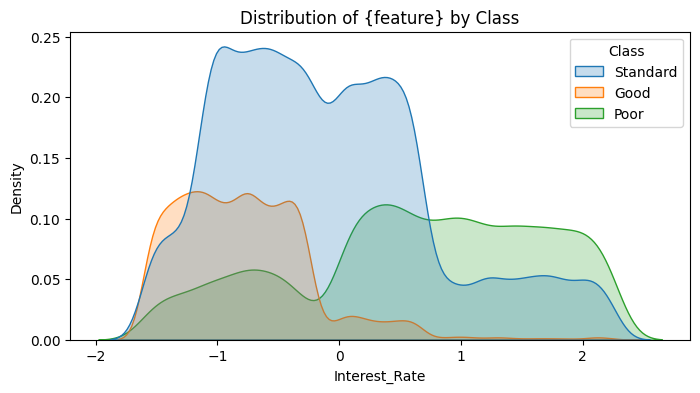

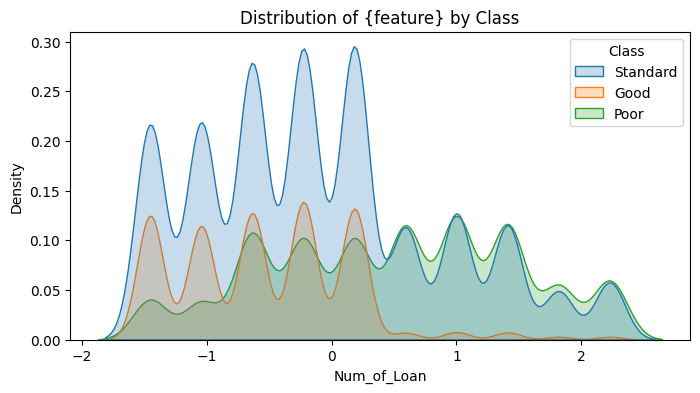

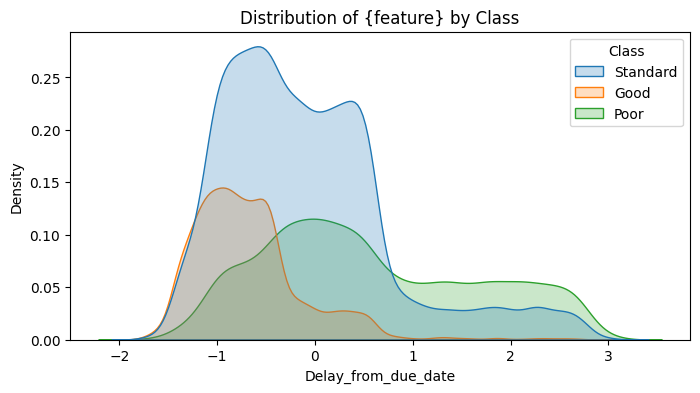

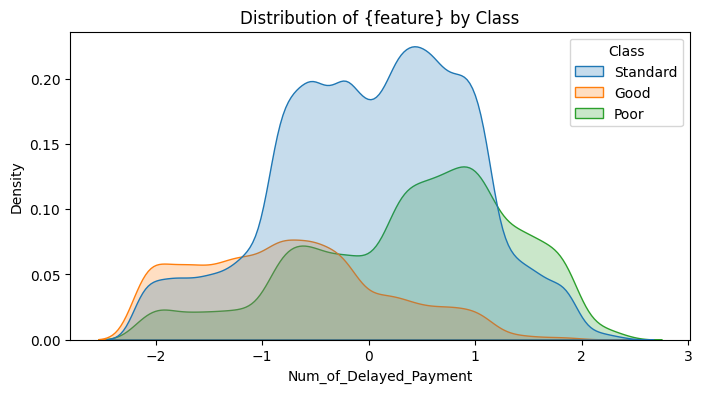

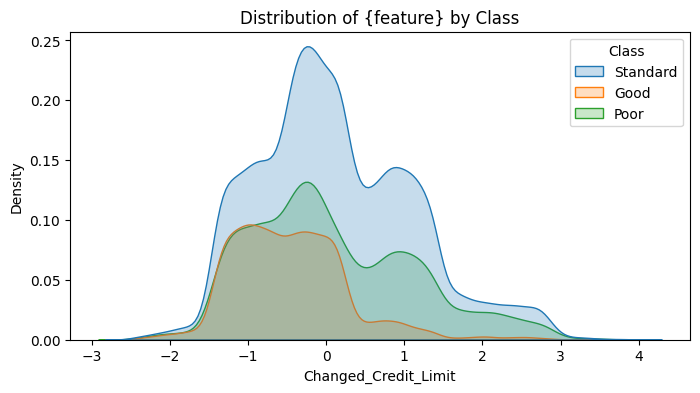

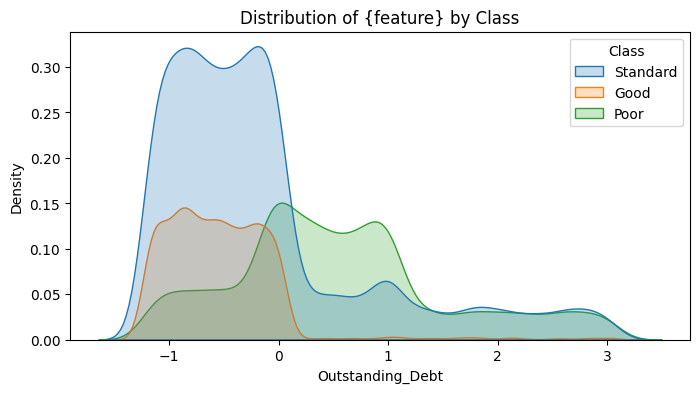

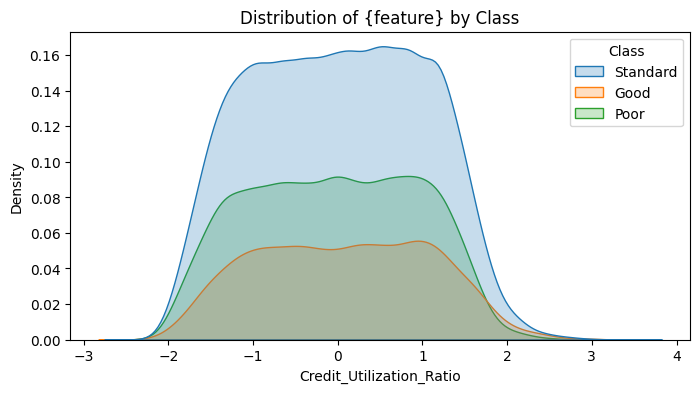

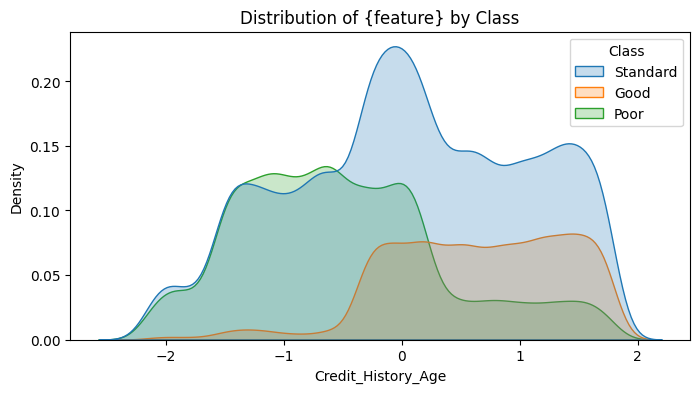

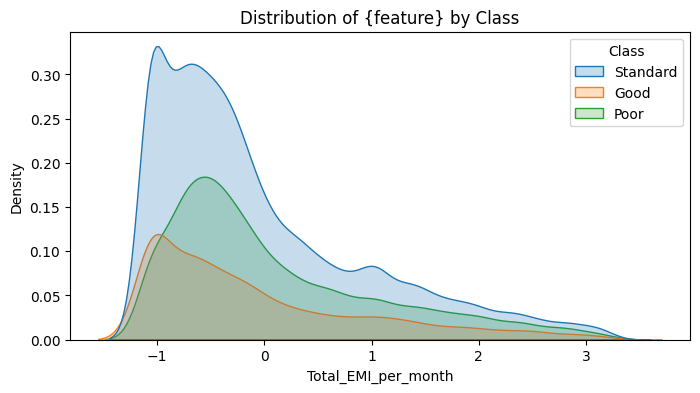

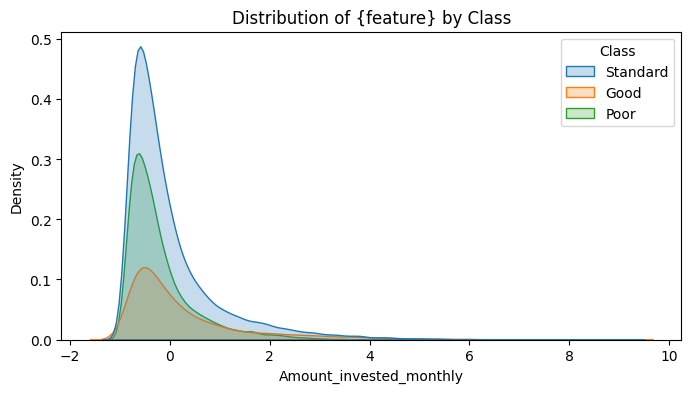

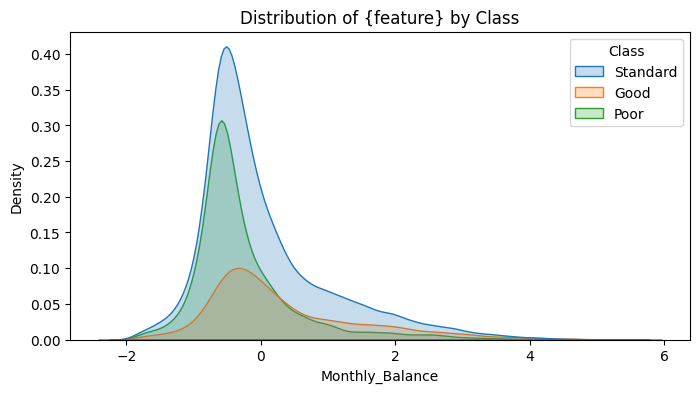

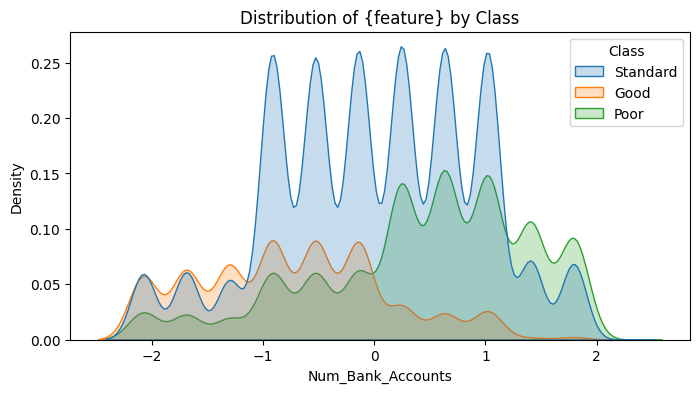

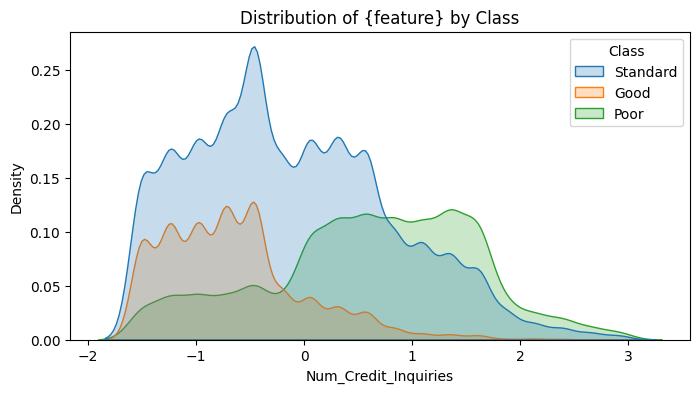

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels
class_labels = ['Good', 'Poor', 'Standard']

# Convert y_train from one-hot encoding to class labels
if len(y_train.shape) > 1:  # If y_train is 2D (one-hot encoded)
    y_train_labels = np.argmax(y_train, axis=1)  # Convert to numeric class labels
else:
    y_train_labels = y_train  # Already numeric

# Map numeric labels to their string class names
y_train_labels_named = [class_labels[label] for label in y_train_labels]

# Combine the features and target into one DataFrame
data_with_labels = pd.concat(
    [
        pd.DataFrame(X_train, columns=continuous_features + list(encoded_df.columns)),
        pd.Series(y_train_labels_named, name='Class')  # Use string class names
    ],
    axis=1
)

# Visualize feature overlap for each continuous feature
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data_with_labels, x=feature, hue='Class', fill=True)
    plt.title("Distribution of {feature} by Class")
    plt.show()


In [ ]:
# Explanation of Metrics
########################

# Accuracy: The proportion of correctly classified samples.
# Precision: The ability of the classifier not to label a negative sample as positive.
# Recall: The ability of the classifier to find all the positive samples.
# F1-score: A weighted average of precision and recall.
# Confusion Matrix: A table showing the number of true positives, true negatives, false positives, and false negatives for each class. 
 
# Important Considerations:
# Averaging:
# The average parameter in precision_score, recall_score, and f1_score can be set to different values:
# 'macro': Calculates the metric for each label, and finds their unweighted mean.
# 'micro': Calculates the metric globally by counting the total true positives, false negatives, and false positives.
# 'weighted': Calculates the metric for each label, and finds their average weighted by support (the number of true instances for each label).
# Class Imbalances:
# If your dataset has class imbalances, consider using metrics like f1_score and recall that are less sensitive to this issue.

# Calculating perofrmace of model
calculate_performance_multiclass(y_tested, y_predicted)

{'accuracy': 0.769,
 'precision': np.float64(0.7487958203862558),
 'recall': np.float64(0.7677846045949468),
 'f1_score': np.float64(0.7573043798840589),
 'confusion_matrix': array([[2091,   31,  718],
        [  98, 3749,  788],
        [ 905, 1156, 6464]])}